Были получены результаты по работе программы, созданы 10 таблиц: по две на каждое изменение шаблонов (по количеству измененных символов на '?') - измеренное время работы и измереннное количество посимвольных сравнений. Шаблоны были сгенерированы для каждого текста, и алгоритмы прогонялись по одинаковым шаблонам. Изменения шаблона происходили так, что заданее генерировались 4 различных индекса строки, на которых будет производиться замена символа на '?'. И постепенно, по одному индексу, шаблоны меняются, и алгоритмы прогоняются по новым шаблонам.
Алгоритмы КМП, в случае замены символов на '?', прогонялись по разделенным строкам по этому символу, а дальше была обработка вхождений каждого кусочка строки и их сопоставление между собой, чтобы в итоге они образовывали исходную строку.
Для улучшения измерения времени каждый прогон алгоритмов проходил 100 раз, и значение времени усреднялось.

На графиках можно увидеть, что наивный поиск во всех случаях имеет меньшее количество посимвольных сравнений, чем алгоритмы КМП. Это связано с подсчетом префикс-функции для каждого шаблона.

Алгоритм КМП с уточненными гранями (также называемый оптимальный в данном отчете), в среднем по времени работает медленнее обычного КМП, из чего можно сделать вывод, что польза от дополнительных вычислений уточненных граней не перекрывает время на их подсчет. Количество символьных сравнений у обычного меньше, что связано с дополнительными вычислениями оптимального.

На шаблонах без замены символов алгоритмы КМП проявили себя лучше, чем наивный, особенно на больших текстах. На маленьких текстах с увеличением шаблона у наивного алгоритма уменьшается время работы, и он становится быстрее КМП при больших шаблонах и маленьком тексте. Это связано с асимптотиками работы КМП (линейная) и наивного алгоритма (O((m-n)n), где m - размер текста, n - размер шаблона). При маленьких m (на маленьких текстах) и больших n время работы наивного алгоритма стремится к линейному, а потому и работает он быстрее КМП.

С ростом размера шаблона количество посимвольных сравнений у наивного поиска уменьшается, так как с большим размером шаблона шанс встретить его в тексте уменьшается.

На шаблонах с заменой символов алгоритмы КМП тратят больше времени, чем наивный, так как КМП по сути прогоняются несколько раз для разных кусочков шаблона, а потом еще и сопоставляют вхождения. Количество работы увеличивается, префикс-функцию требуется вычислять большее количество раз, в то время как наивный не меняет свою методику работы, что и приводит к таким результатам.

Также можно заметить интересный результат, на шаблонах с заменой на самых маленьких шаблонах (когда КМП себя лучше всего проявляет) иногда время выполнения меньше наивного, даже учитывая необходимость несколько раз прогонять алгоритм на кусочках строк.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib.gridspec as gridspec

algs = ["Naive Comparison", "Standard KMP", "Optimal KMP"]
texts = ["Binary Small Text", "Binary Large Text", "DNA Small Text", "DNA Large Text"]

Графики для шаблонов без замены символов на '?'

In [2]:
times = pd.read_csv("tables/БПИ213_Кадыкова_0AddsComputingTime.csv", sep=';')
oper = pd.read_csv("tables/БПИ213_Кадыкова_0AddsOperations.csv", sep=';')

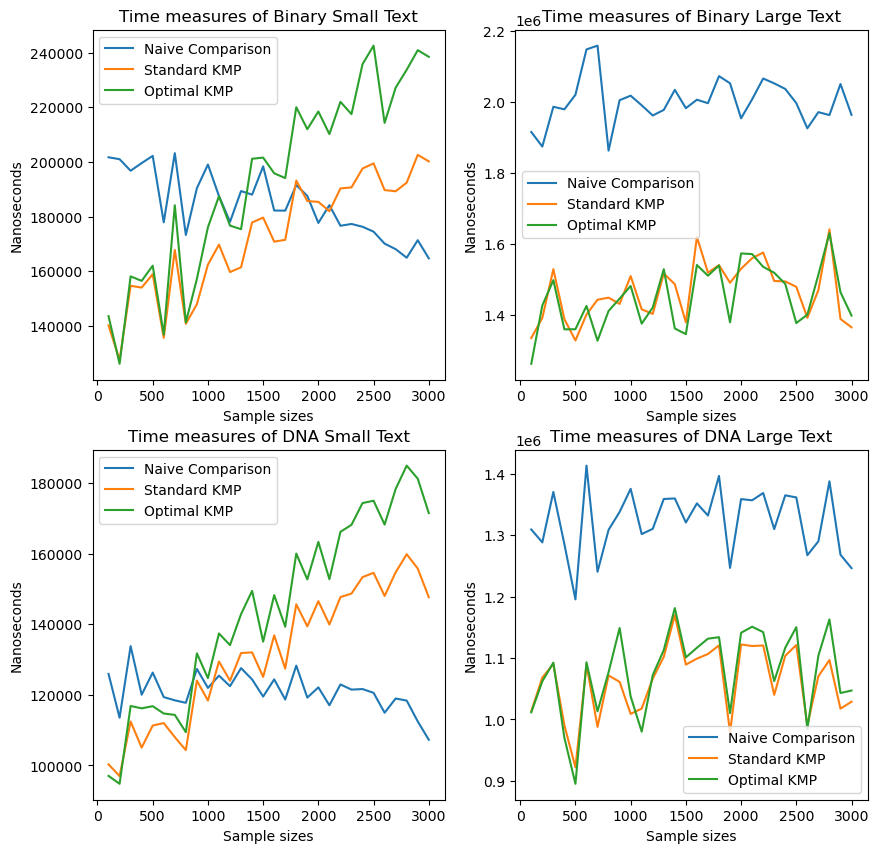

In [3]:
#@title Графики измеренного времени по всем алгоритмам для конкретного текста, где шаблоны оставлены неизменными
#for all algs, computing time table with 0 adds of '?' in samples 

gs = gridspec.GridSpec(2, 2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for curr, grd in zip(texts, itertools.product([0, 1], [0, 1])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    for alg in algs:
        plt.plot(times["Sample sizes"], times[curr + " & " + alg], label=alg)
    ax.set(xlabel='Sample sizes', ylabel='Nanoseconds',
        title='Time measures of ' + curr)
    plt.legend()

fig.savefig("images/ZeroAddsComputingTime.png")
plt.show()

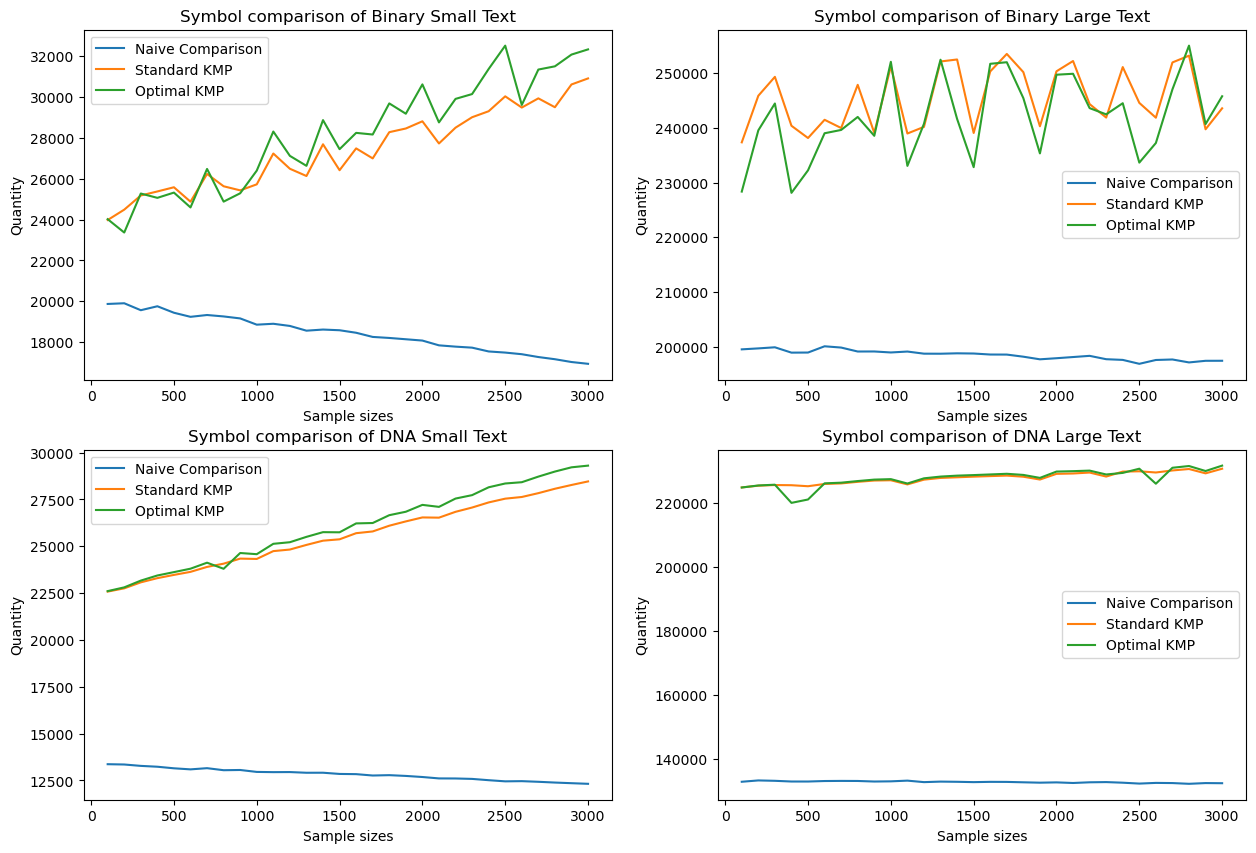

In [4]:
#@title Графики количества посимвольных сравнений по всем алгоритмам для конкретного текста, где шаблоны оставлены неизменными
#for all algs, operations table with 0 adds of '?' in samples

gs = gridspec.GridSpec(2, 2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for curr, grd in zip(texts, itertools.product([0, 1], [0, 1])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    for alg in algs:
        plt.plot(oper["Sample sizes"], oper[curr + " & " + alg], label=alg)
    ax.set(xlabel='Sample sizes', ylabel='Quantity',
        title='Symbol comparison of ' + curr)
    plt.legend()

fig.savefig("images/ZeroAddsOperations.png")
plt.show()

Графики для шаблонов c 1 измененным символом

In [5]:
times = pd.read_csv("tables/БПИ213_Кадыкова_1AddsComputingTime.csv", sep=';')
oper = pd.read_csv("tables/БПИ213_Кадыкова_1AddsOperations.csv", sep=';')

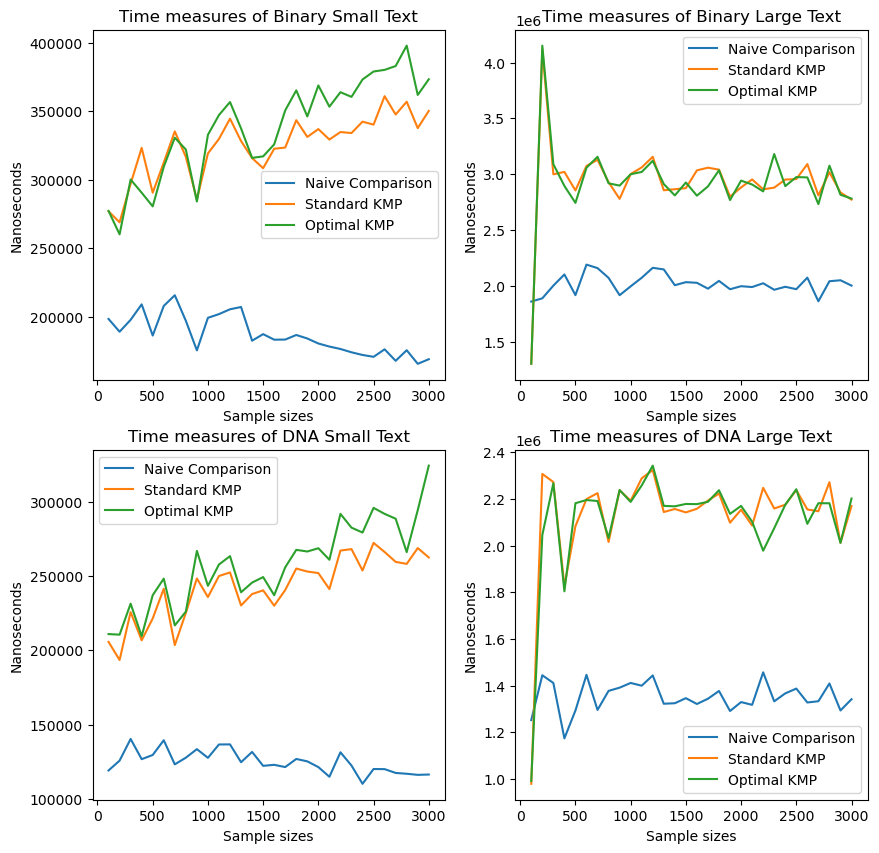

In [6]:
#@title Графики измеренного времени по всем алгоритмам для конкретного текста, где в шаблоне заменен 1 символ на '?' 
#for all algs, computing time table with 1 add of '?' in samples 

gs = gridspec.GridSpec(2, 2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for curr, grd in zip(texts, itertools.product([0, 1], [0, 1])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    for alg in algs:
        plt.plot(times["Sample sizes"], times[curr + " & " + alg], label=alg)
    ax.set(xlabel='Sample sizes', ylabel='Nanoseconds',
        title='Time measures of ' + curr)
    plt.legend()

fig.savefig("images/OneAddComputingTime.png")
plt.show()

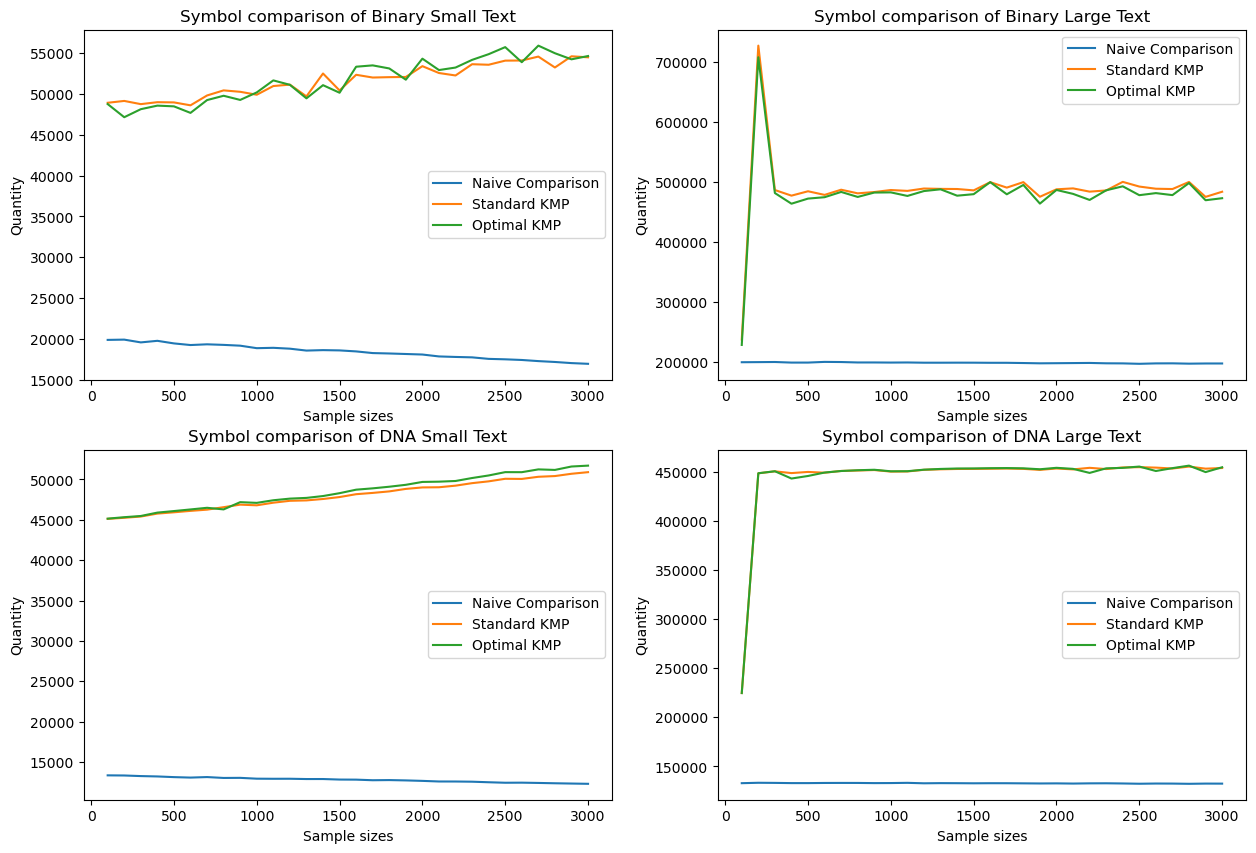

In [7]:
#@title Графики количества посимвольных сравнений по всем алгоритмам для конкретного текста, где в шаблоне заменен 1 символ на '?' 
#for all algs, operations table with 1 add of '?' in samples

gs = gridspec.GridSpec(2, 2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for curr, grd in zip(texts, itertools.product([0, 1], [0, 1])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    for alg in algs:
        plt.plot(oper["Sample sizes"], oper[curr + " & " + alg], label=alg)
    ax.set(xlabel='Sample sizes', ylabel='Quantity',
        title='Symbol comparison of ' + curr)
    plt.legend()

fig.savefig("images/OneAddOperations.png")
plt.show()

Графики для шаблонов c 2 измененными символами

In [8]:
times = pd.read_csv("tables/БПИ213_Кадыкова_2AddsComputingTime.csv", sep=';')
oper = pd.read_csv("tables/БПИ213_Кадыкова_2AddsOperations.csv", sep=';')

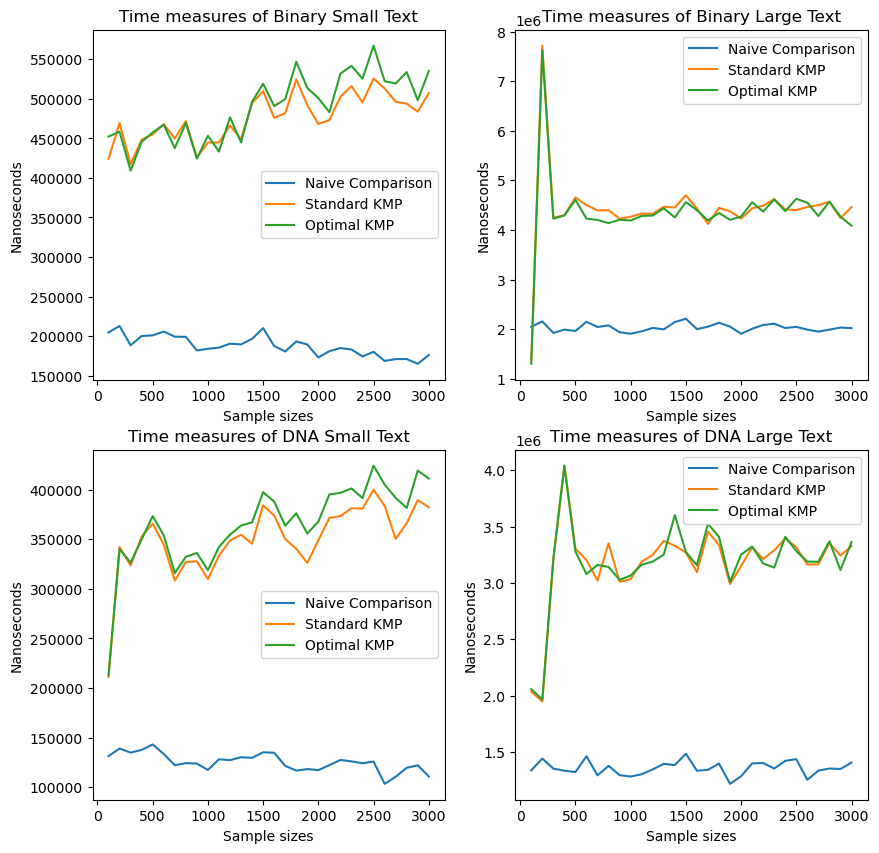

In [9]:
#@title Графики измеренного времени по всем алгоритмам для конкретного текста, где в шаблоне заменены 2 символа на '?' 
#for all algs, computing time table with 2 add of '?' in samples 

gs = gridspec.GridSpec(2, 2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for curr, grd in zip(texts, itertools.product([0, 1], [0, 1])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    for alg in algs:
        plt.plot(times["Sample sizes"], times[curr + " & " + alg], label=alg)
    ax.set(xlabel='Sample sizes', ylabel='Nanoseconds',
        title='Time measures of ' + curr)
    plt.legend()

fig.savefig("images/TwoAddsComputingTime.png")
plt.show()

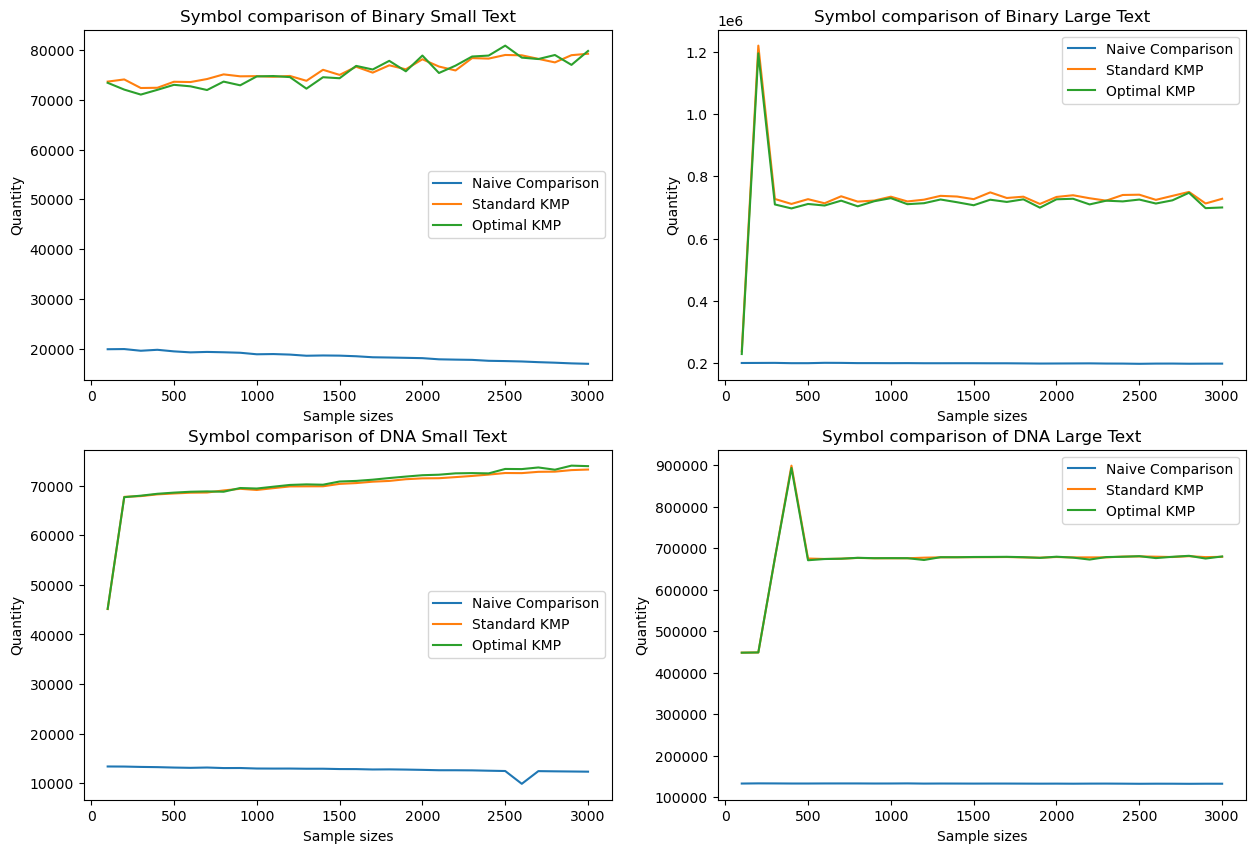

In [10]:
#@title Графики количества посимвольных сравнений по всем алгоритмам для конкретного текста, где в шаблоне заменены 2 символа на '?' 
#for all algs, operations table with 2 adds of '?' in samples

gs = gridspec.GridSpec(2, 2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for curr, grd in zip(texts, itertools.product([0, 1], [0, 1])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    for alg in algs:
        plt.plot(oper["Sample sizes"], oper[curr + " & " + alg], label=alg)
    ax.set(xlabel='Sample sizes', ylabel='Quantity',
        title='Symbol comparison of ' + curr)
    plt.legend()

fig.savefig("images/TwoAddsOperations.png")
plt.show()

Графики для шаблонов c 3 измененным символом

In [12]:
times = pd.read_csv("tables/БПИ213_Кадыкова_3AddsComputingTime.csv", sep=';')
oper = pd.read_csv("tables/БПИ213_Кадыкова_3AddsOperations.csv", sep=';')

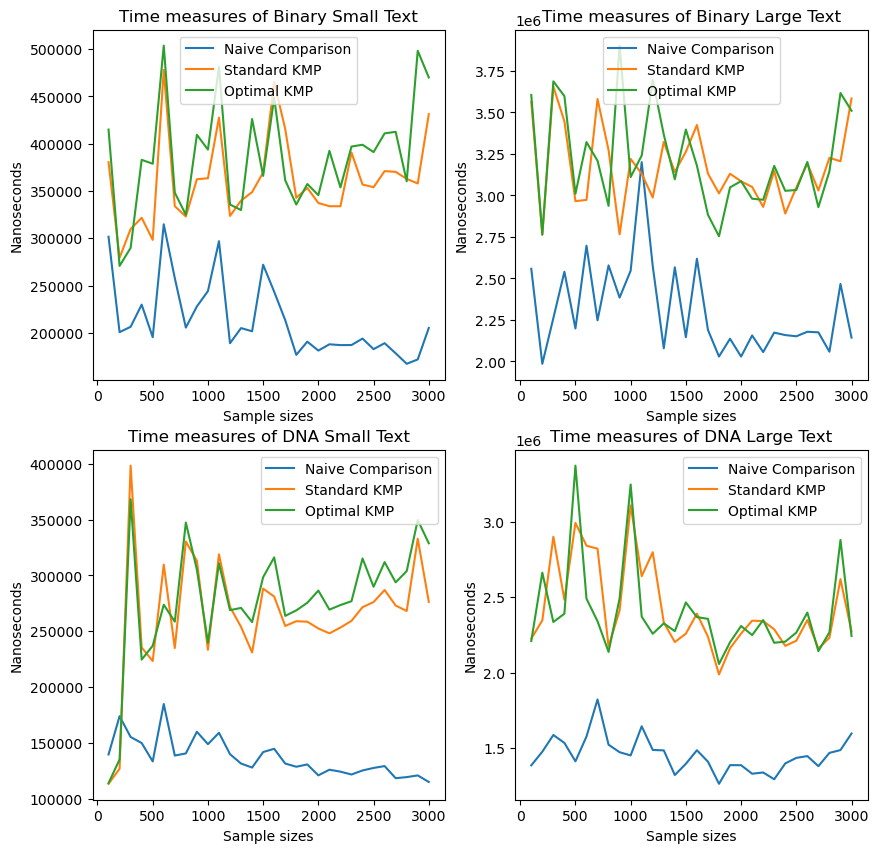

In [13]:
#@title Графики измеренного времени по всем алгоритмам для конкретного текста, где в шаблоне заменены 3 символа на '?' 
#for all algs, computing time table with 3 add of '?' in samples 

gs = gridspec.GridSpec(2, 2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for curr, grd in zip(texts, itertools.product([0, 1], [0, 1])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    for alg in algs:
        plt.plot(times["Sample sizes"], times[curr + " & " + alg], label=alg)
    ax.set(xlabel='Sample sizes', ylabel='Nanoseconds',
        title='Time measures of ' + curr)
    plt.legend()

fig.savefig("images/ThreeAddsComputingTime.png")
plt.show()

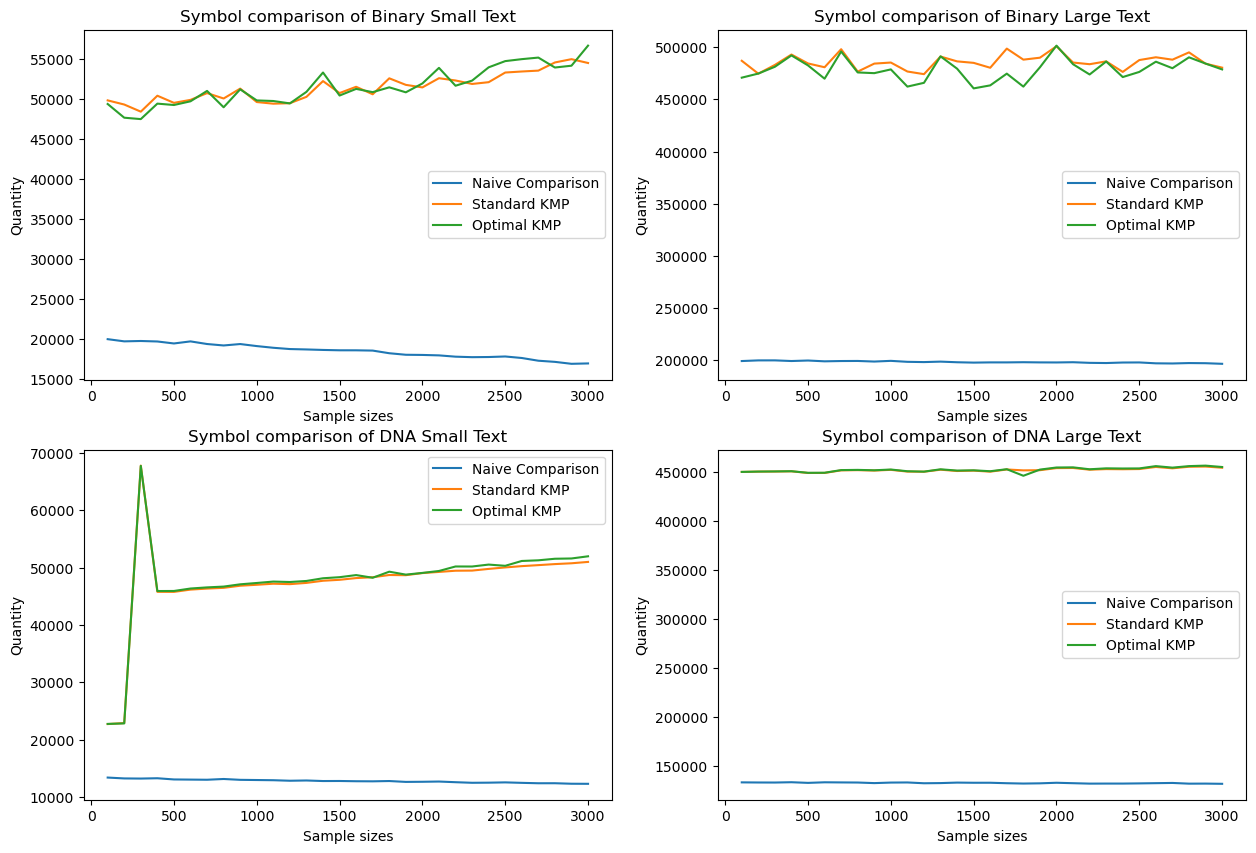

In [14]:
#@title Графики количества посимвольных сравнений по всем алгоритмам для конкретного текста, где в шаблоне заменены 3 символа на '?' 
#for all algs, operations table with 3 adds of '?' in samples

gs = gridspec.GridSpec(2, 2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for curr, grd in zip(texts, itertools.product([0, 1], [0, 1])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    for alg in algs:
        plt.plot(oper["Sample sizes"], oper[curr + " & " + alg], label=alg)
    ax.set(xlabel='Sample sizes', ylabel='Quantity',
        title='Symbol comparison of ' + curr)
    plt.legend()

fig.savefig("images/ThreeAddsOperations.png")
plt.show()

Графики для шаблонов c 4 измененным символом

In [15]:
times = pd.read_csv("tables/БПИ213_Кадыкова_4AddsComputingTime.csv", sep=';')
oper = pd.read_csv("tables/БПИ213_Кадыкова_4AddsOperations.csv", sep=';')

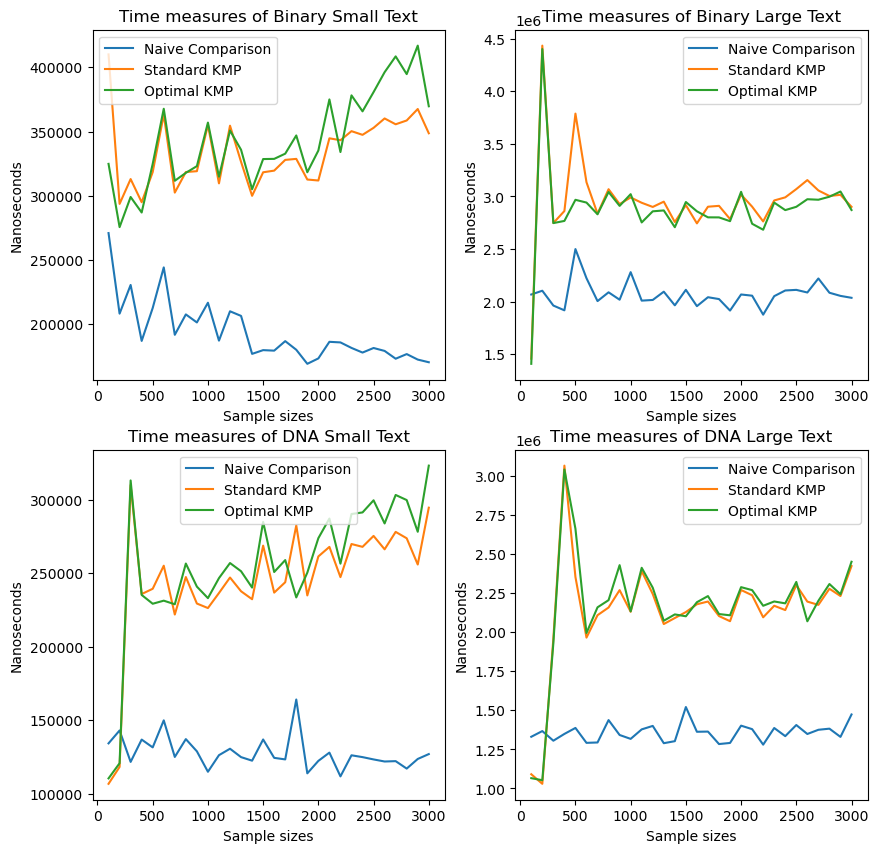

In [16]:
#@title Графики измеренного времени по всем алгоритмам для конкретного текста, где в шаблоне заменены 4 символа на '?' 
#for all algs, computing time table with 4 add of '?' in samples 

gs = gridspec.GridSpec(2, 2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for curr, grd in zip(texts, itertools.product([0, 1], [0, 1])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    for alg in algs:
        plt.plot(times["Sample sizes"], times[curr + " & " + alg], label=alg)
    ax.set(xlabel='Sample sizes', ylabel='Nanoseconds',
        title='Time measures of ' + curr)
    plt.legend()

fig.savefig("images/FourAddsComputingTime.png")
plt.show()

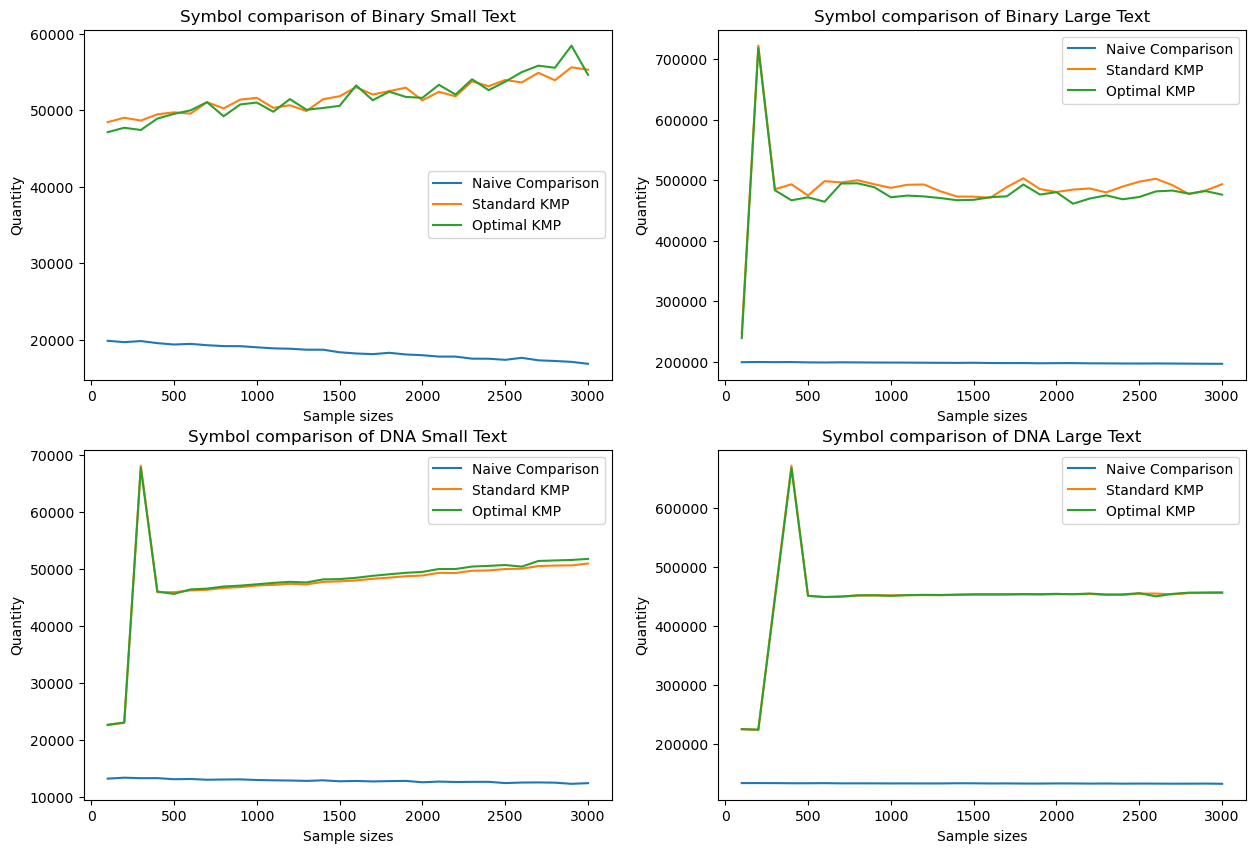

In [17]:
#@title Графики количества посимвольных сравнений по всем алгоритмам для конкретного текста, где в шаблоне заменены 4 символа на '?' 
#for all algs, operations table with 4 adds of '?' in samples

gs = gridspec.GridSpec(2, 2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for curr, grd in zip(texts, itertools.product([0, 1], [0, 1])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    for alg in algs:
        plt.plot(oper["Sample sizes"], oper[curr + " & " + alg], label=alg)
    ax.set(xlabel='Sample sizes', ylabel='Quantity',
        title='Symbol comparison of ' + curr)
    plt.legend()

fig.savefig("images/FourAddsOperations.png")
plt.show()